In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Get the shape of the data (Understand the no of rows & columns)
df.shape

(303, 14)

In [4]:
# Get information about the Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Get information about the numeric columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# No Null values present to be actioned
# No Categorical Data to be actioned (Already addressed City)

In [76]:
# Create Independent & Dependent Variables
X=df.iloc[:,:13]
y=df.iloc[:,13]

In [99]:
# Create Training & Test Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [105]:
# Model building 
# KNN 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
classifier = KNeighborsClassifier(n_neighbors = 9)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [103]:
# Model building 
# SVM - Has 0.63 accuracy
from sklearn import svm
classifier=svm.SVC(kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix:
[[24 14]
 [ 1 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        38
           1       0.73      0.97      0.83        38

    accuracy                           0.80        76
   macro avg       0.84      0.80      0.80        76
weighted avg       0.84      0.80      0.80        76

Accuracy: 0.8026315789473685
0.7254901960784313


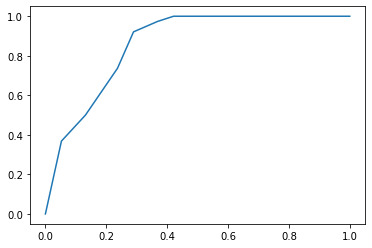

In [106]:
# Evaluation of the Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,roc_curve
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test,y_pred))
pred_prob1=classifier.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
plt.plot(fpr,tpr)

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

   feature       VIF
0      sex  3.038525
1       cp  2.112149
2      fbs  1.222870
3  restecg  1.957971
4    exang  1.795800
5  oldpeak  2.062440
6    slope  3.756703
7       ca  1.686170


In [81]:
X=X.drop(['trestbps'],axis=1)

In [83]:
X=X.drop(['thalach'],axis=1)

In [90]:
X=X.drop(['chol'],axis=1)

In [89]:
X=X.drop(['thal'],axis=1)

In [98]:
X=X.drop(['age'],axis=1)

In [91]:
X

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
0,63,1,3,1,0,0,2.3,0,0
1,37,1,2,0,1,0,3.5,0,0
2,41,0,1,0,0,0,1.4,2,0
3,56,1,1,0,1,0,0.8,2,0
4,57,0,0,0,1,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,1,1,0.2,1,0
299,45,1,3,0,1,0,1.2,1,0
300,68,1,0,1,1,0,3.4,1,2
301,57,1,0,0,1,1,1.2,1,1
